# <center>**Predict the fare amount of future rides using regression analysis**



<div style="text-align: right">
    Submitted by - Aparna K
</div>

### Acknowledgement:
- MentorMind, upGrad

### Description:
This project addresses the challenge of predicting ride fares for Uber, where dynamic factors like trip distance, time, location, and demand make accurate estimation essential. The dataset includes key trip details such as timestamps, passenger counts, and geographical coordinates, forming the foundation for developing and evaluating predictive models. By leveraging historical trip data, the project aims to create a reliable model that enhances customer trust, supports transparent pricing, and improves operational efficiency in ride-hailing services like Uber.


### Objective:
- Build a regression model and accurately develop a predictive model.
- Identify key variables such as distance,time,traffic,pickup/dropoff locations and so on.
- Perform data preprocessing, feature engineering, and evaluate various regression models.
- Deploy and Automate Predictions.


### Significance:
- Improved Customer Experience
- Optimizing resource allocation
-Improving profitability in ride-hailing services
- Enabling transparent pricing

# Strategic Plan of action

1. Data Exploration and understanding
2. Data Cleaning
3. Feature Engineering and Selection
4. Data Scaling/Normalization
5. Model Development and Training
6. Predictive Modelling and evaluation
7. Project Outcomes & Conclusion









# 1. Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 2.Load and Explore the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/uber.csv')

Mounted at /content/drive


In [3]:
# Summary Statistics and Missing Values
print(data['fare_amount'].describe(), "\n\nMissing Values:\n", data.isnull().sum())

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64 

Missing Values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


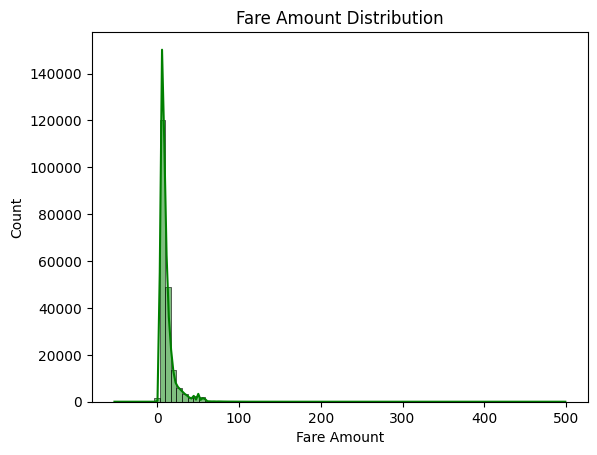

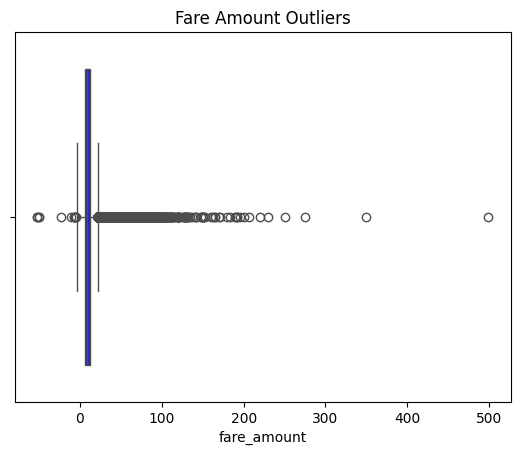

In [4]:
# Visualize the Fare Amount Distribution
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
sns.histplot(data['fare_amount'], kde=True, bins=80, color='Green')
plt.show()

# Fare amount outliers
plt.title('Fare Amount Outliers')
sns.boxplot(x=data['fare_amount'], color='Blue')
plt.show()

# 3.Handle Missing Data

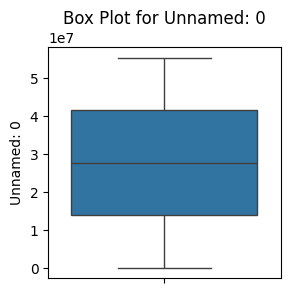

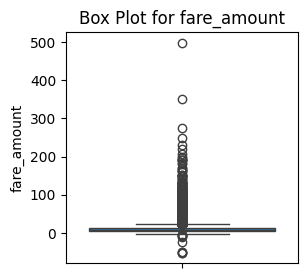

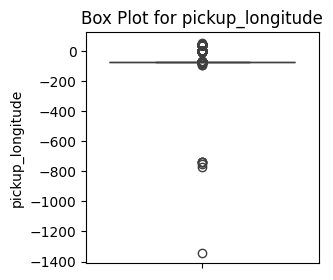

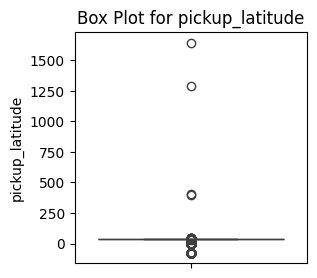

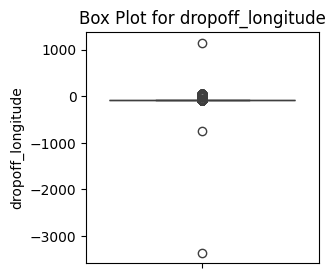

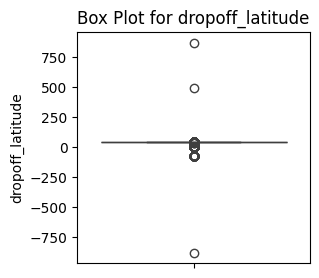

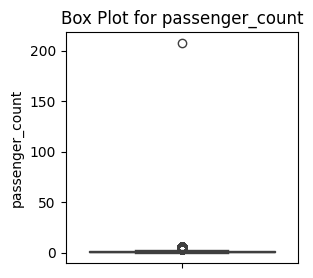

In [5]:
# display box plots for all numeric columns in the DataFrame data to visualize the distribution and detect outliers.

data_numeric = data.select_dtypes(include=[np.number])

for col in data_numeric.columns:
    if pd.api.types.is_numeric_dtype(data[col]):  # Check for numeric data
        plt.figure(figsize=(3, 3))
        sns.boxplot(data[col])
        plt.title(f"Box Plot for {col}")
        plt.show()

In [6]:
''' The code removes outliers from all numeric columns in df by filtering rows based on the
Interquartile Range (IQR) method, which defines outliers as values beyond 1.5 times the
IQR above the 75th percentile or below the 25th percentile. '''


for col in data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to exclude outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

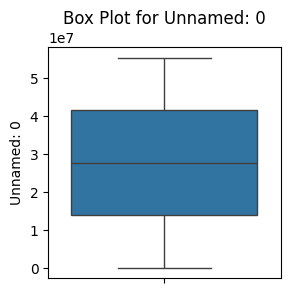

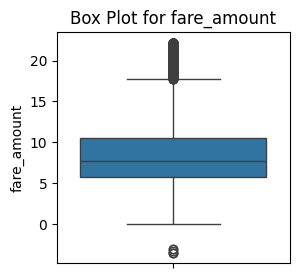

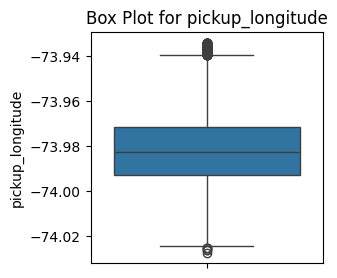

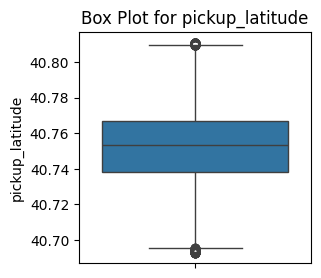

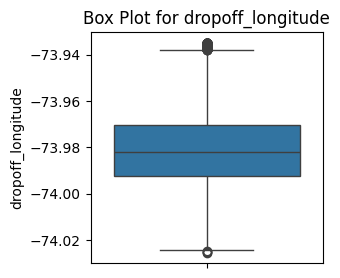

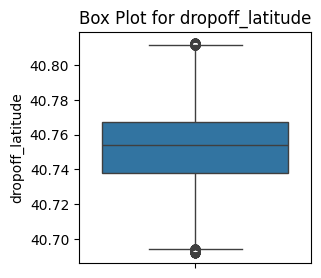

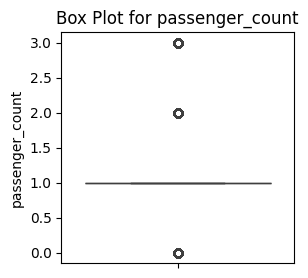

In [7]:
# display box plots

data_numeric = data.select_dtypes(include=[np.number])

for col in data_numeric.columns:
    if pd.api.types.is_numeric_dtype(data[col]):  # Check for numeric data
        plt.figure(figsize=(3, 3))
        sns.boxplot(data[col])
        plt.title(f"Box Plot for {col}")
        plt.show()

In [8]:
# Handle Missing Data
data_cleaned = data.dropna()

In [9]:
# Extract additional features
data_cleaned["pickup_datetime"] = pd.to_datetime(data_cleaned["pickup_datetime"])
data_cleaned["year"] = data_cleaned["pickup_datetime"].dt.year
data_cleaned["month"] = data_cleaned["pickup_datetime"].dt.month
data_cleaned["weekday"] = data_cleaned["pickup_datetime"].dt.weekday
data_cleaned["hour"] = data_cleaned["pickup_datetime"].dt.hour

In [10]:
# Save Cleaned Dataset to Google Drive
cleaned_file_path = '/content/drive/MyDrive/cleaned_uber_data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: /content/drive/MyDrive/cleaned_uber_data.csv


# 4.Feature Engineering

In [11]:
# Converting the "pickup_datetime" column in the DataFrame data to a datetime format, then
# extracting and creating new columns for the year, month, weekday, and hour from the "pickup_datetime" column.
# for better visualization

data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"]) # Use pd.to_datetime to convert the column to datetime

data["year"] = data["pickup_datetime"].dt.year
data["month"] = data["pickup_datetime"].dt.month
data["weekday"] = data["pickup_datetime"].dt.weekday
data["hour"] = data["pickup_datetime"].dt.hour

In [12]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2


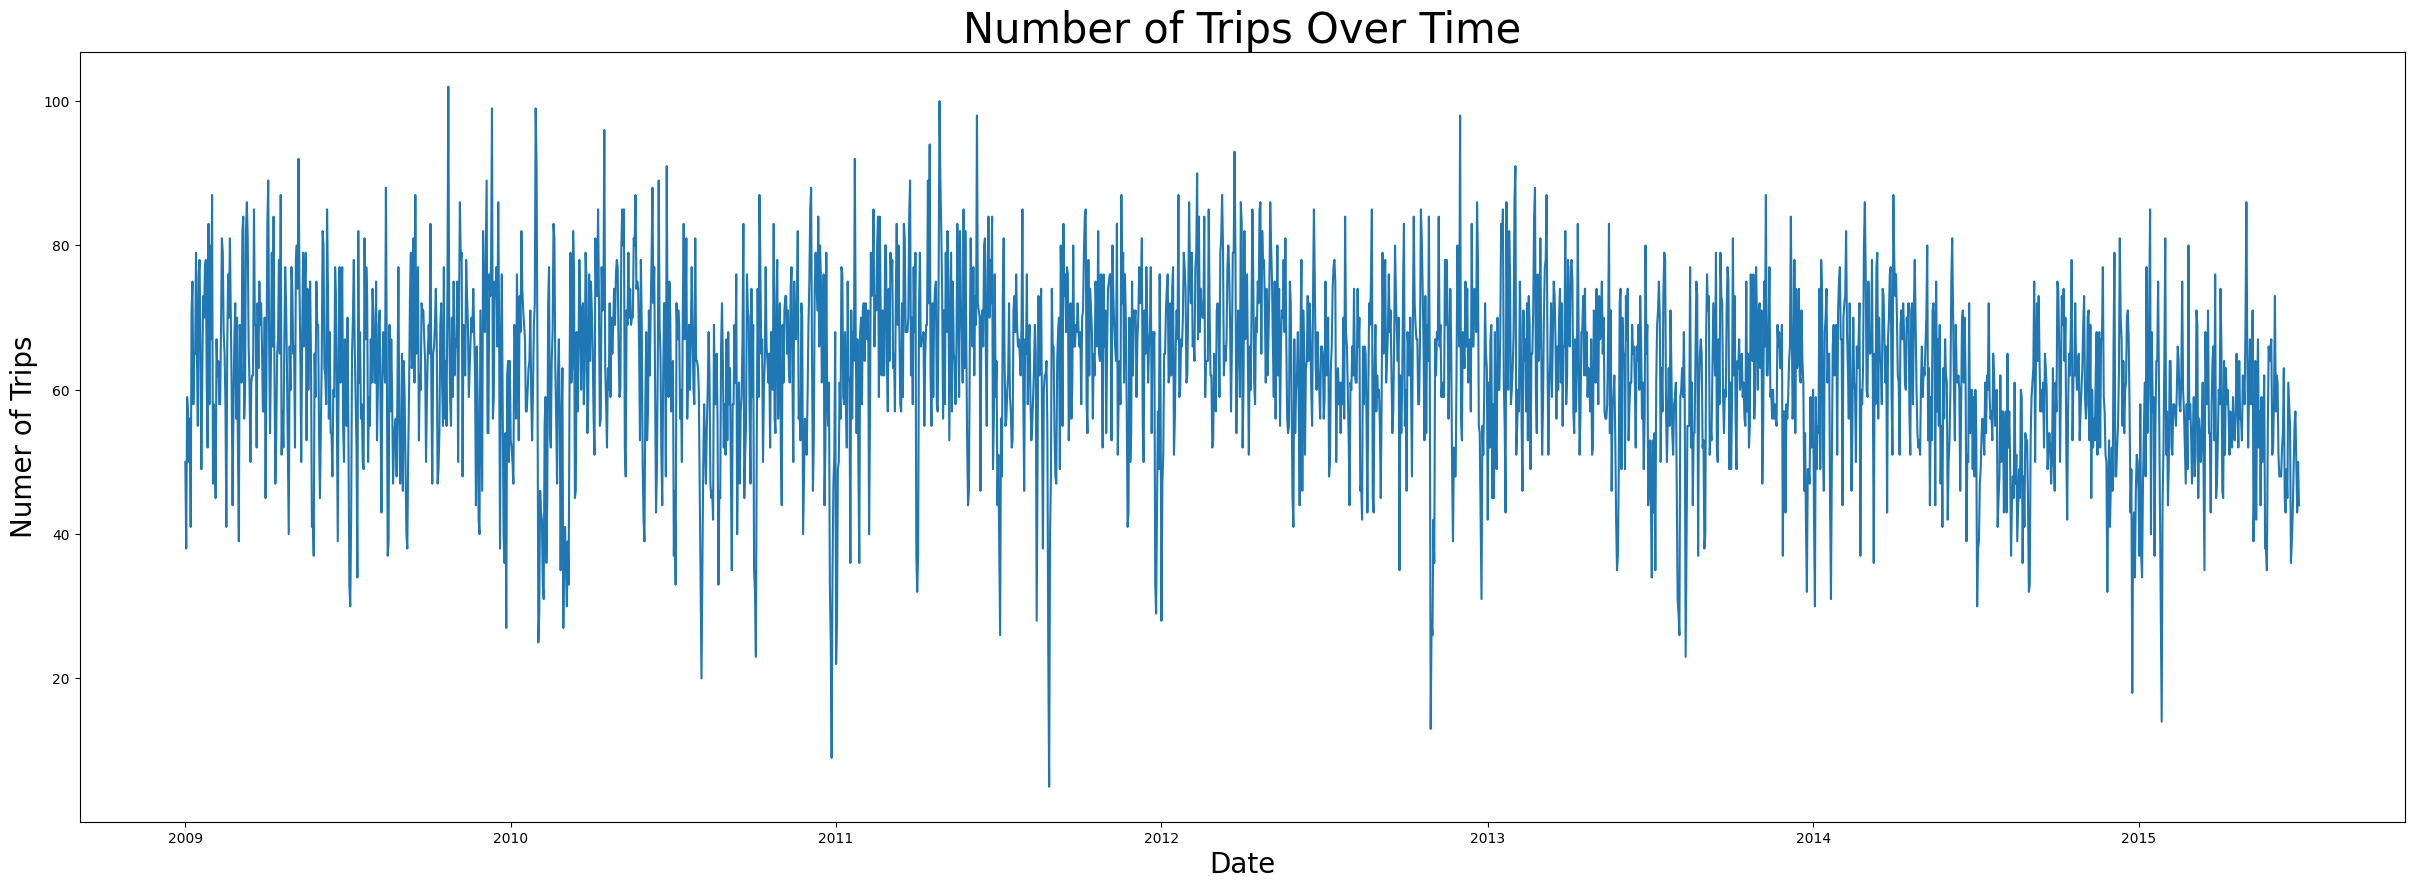

In [13]:
# Plot number of trips over time
# Assuming 'data' has a 'pickup_datetime' column:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
trips_by_date = data.groupby(data['pickup_datetime'].dt.date)['pickup_datetime'].count()
plt.figure(figsize=(30,10))
trips_by_date.plot()
plt.title('Number of Trips Over Time', size = 30)
plt.xlabel('Date', size = 20)
plt.ylabel('Numer of Trips', size = 20)
plt.show()

In [14]:
# Feature 2: Day of Week
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Thursday
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Friday
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Monday
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Friday
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2,Saturday


In [15]:
# Feature 3: Trip Distance (using geodesic to calculate distance between pickup and dropoff)

df = data[(data["pickup_latitude"].between(-90,90)) &
        (data["dropoff_latitude"].between(-90,90)) &
        (data["pickup_longitude"].between(-180,180))&
        (data["dropoff_longitude"].between(-180,180))]

In [16]:
# Calculate Trip Distance
distances = []
for i in data_cleaned.index:
    pickup_coords = (data_cleaned["pickup_latitude"][i], data_cleaned["pickup_longitude"][i])
    dropoff_coords = (data_cleaned["dropoff_latitude"][i], data_cleaned["dropoff_longitude"][i])
    if -90 <= pickup_coords[0] <= 90 and -90 <= dropoff_coords[0] <= 90:
        distance = round(geodesic(pickup_coords, dropoff_coords).m, 2)
        distances.append(distance)
    else:
        distances.append(np.nan)

data_cleaned["distance"] = distances

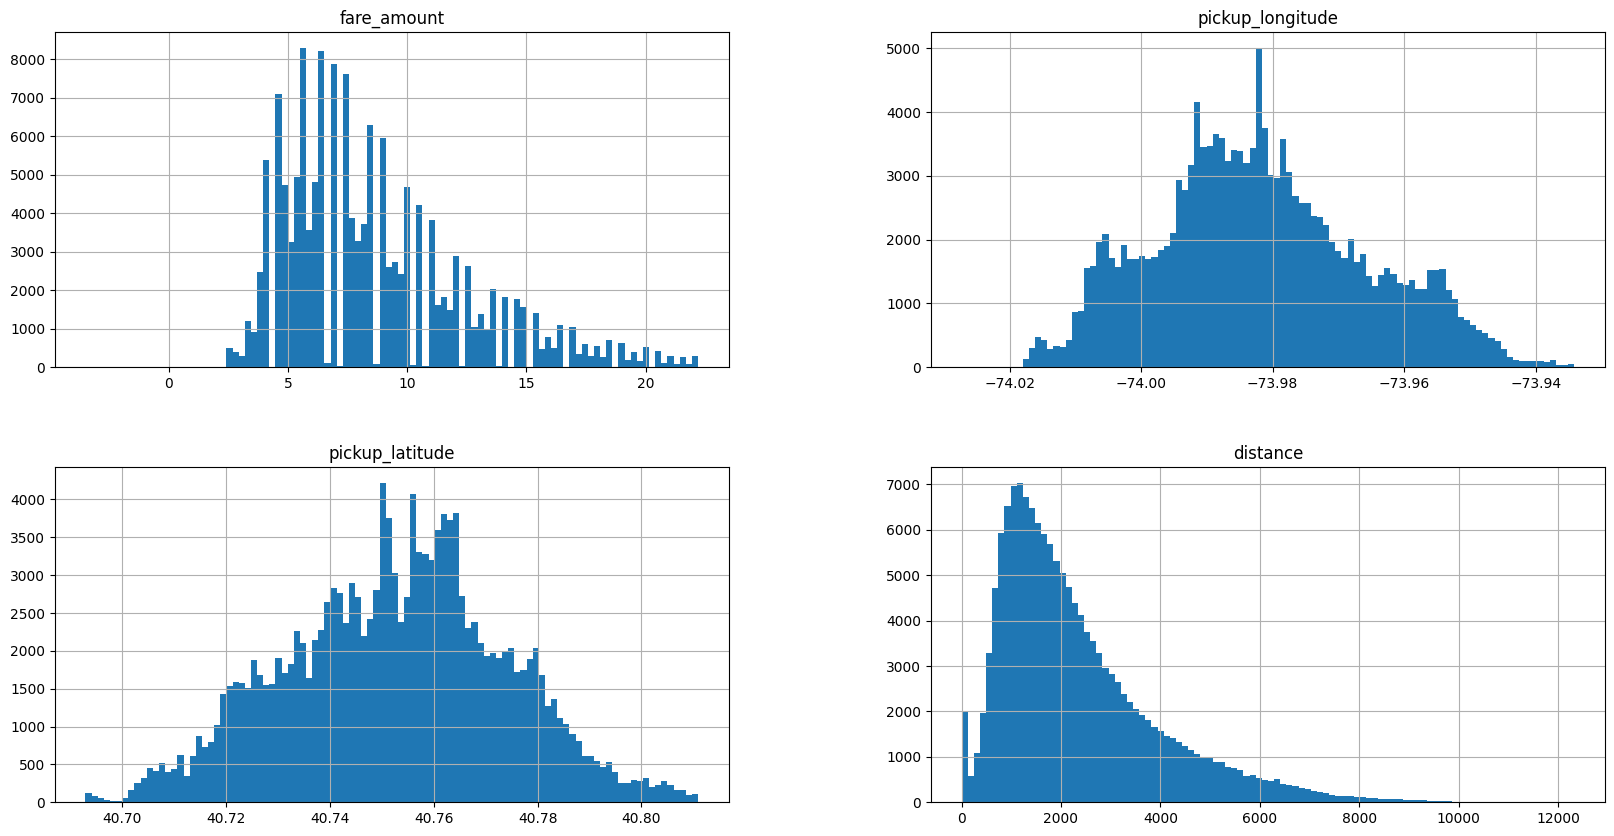

In [17]:
data_cleaned[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'distance']].hist(bins=100, figsize=(20, 10))
plt.show()

In [18]:
#distance categories (short, medium, long)

def categorize_distance(distance):
    if pd.isnull(distance):
        return 'Unknown'
    elif distance < 2:
        return 'Short'
    elif 2 <= distance < 5:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to the data_cleaned DataFrame which has the 'distance' column
data_cleaned['distance_category'] = data_cleaned['distance'].apply(categorize_distance)
print(data_cleaned[['distance', 'distance_category']].head()) # Print from data_cleaned

   distance distance_category
0   1681.11              Long
1   2454.36              Long
2   5039.60              Long
3   1661.44              Long
5      0.00             Short


In [19]:
# Display the new features from the correct DataFrame (data_cleaned)
data_cleaned['day_of_week'] = pd.to_datetime(data_cleaned['pickup_datetime']).dt.day_name()
print(data_cleaned[['pickup_datetime', 'day_of_week', 'distance', 'distance_category']].head())

            pickup_datetime day_of_week  distance distance_category
0 2015-05-07 19:52:06+00:00    Thursday   1681.11              Long
1 2009-07-17 20:04:56+00:00      Friday   2454.36              Long
2 2009-08-24 21:45:00+00:00      Monday   5039.60              Long
3 2009-06-26 08:22:21+00:00      Friday   1661.44              Long
5 2011-02-12 02:27:09+00:00    Saturday      0.00             Short


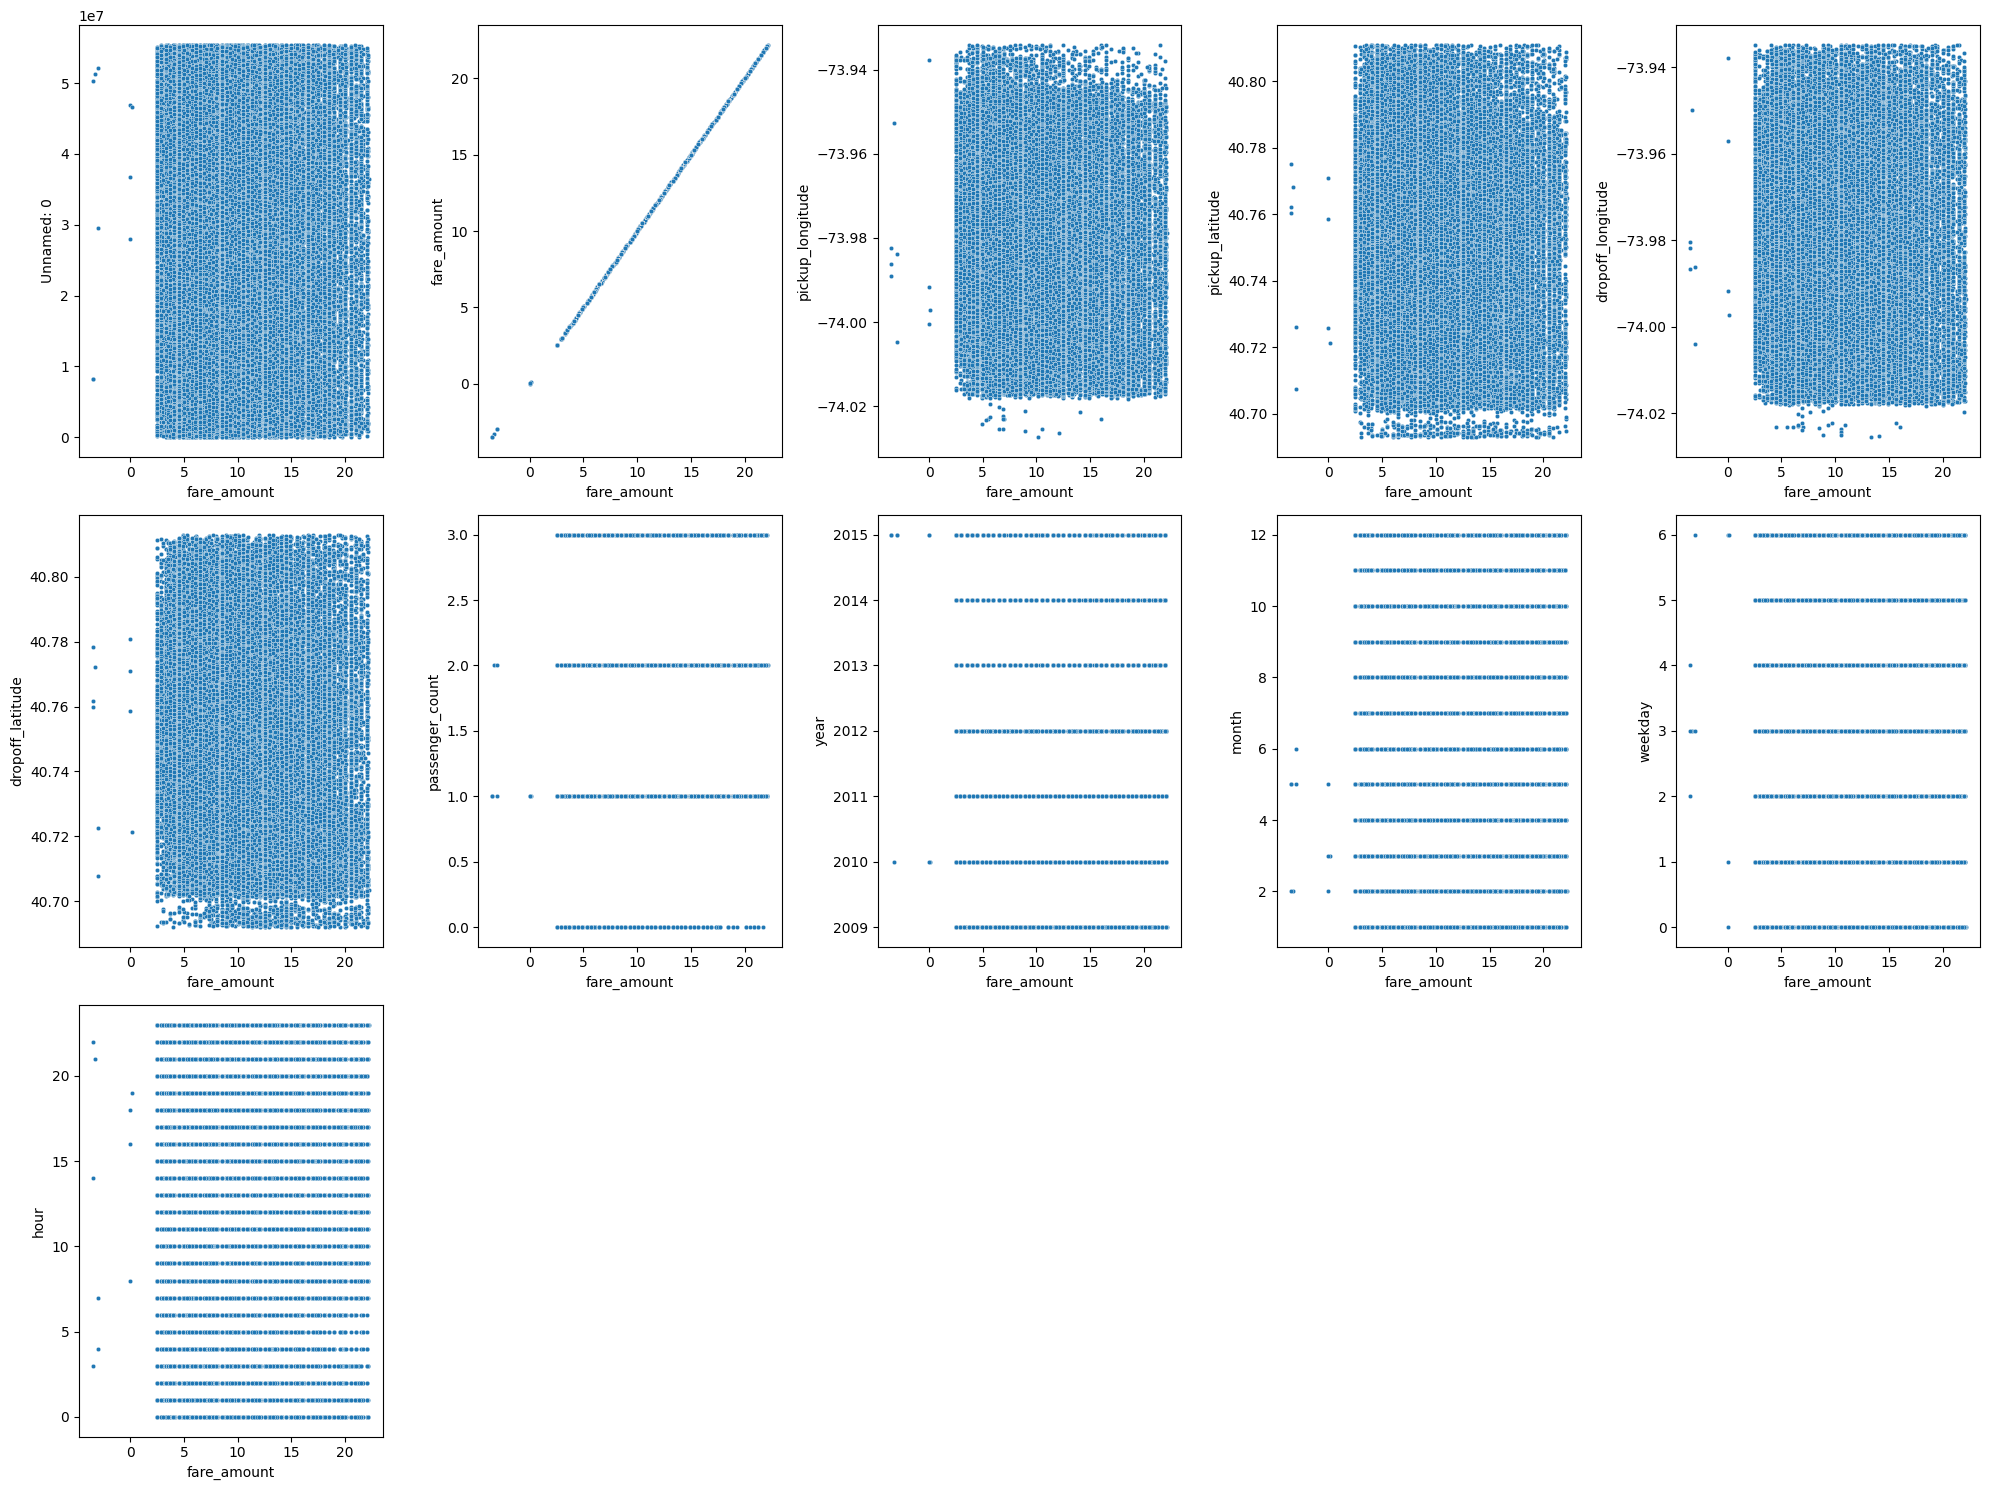

In [20]:
# Limit the number of variables to plot
columns_to_plot = data.select_dtypes(include=[np.number]).columns  # Only numerical columns

plt.figure(figsize=(20, 15))
plotnumber = 1
for column in columns_to_plot:
    if plotnumber <= 15:  # Adjust number of plots to display (e.g., top 15 columns)
        plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=data["fare_amount"], y=data[column], s=10)  # Use smaller markers for faster plotting
        plt.xlabel("fare_amount")
        plt.ylabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

#5. Split the dataset



In [21]:
# Define Features and Target
X = data_cleaned[['passenger_count', 'distance', 'hour', 'weekday']]  # Selected relevant features
y = data_cleaned['fare_amount']

# Impute Missing Values and Scale Features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = X.replace([np.inf, -np.inf], np.nan) #replace inf values with nan
X_imputed = imputer.fit_transform(X_imputed)

In [22]:
# Scale the features before train-test split
from sklearn.preprocessing import StandardScaler # Changed StandardScale to StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Scale the test data (this step is already correct)
X_test_scaled = scaler.transform(X_test)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

#6. Data Scaling/Normalization


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_test_scaled = scaler.transform(X_test)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(148074, 4) (148074,) (118459, 4) (29615, 4) (118459,) (29615,)


In [25]:
print("X_scaled:", X_scaled)
print("X_test_scaled:", X_test_scaled)

X_scaled: [[-0.47502273 -0.41352511  0.84461533 -0.00947747]
 [-0.47502273  0.06731448  1.00216714  0.50722623]
 [-0.47502273  1.67492619  1.15971895 -1.55958857]
 ...
 [-0.47502273 -0.29007075 -1.99131722  0.50722623]
 [-0.47502273  0.74026605  0.05685629 -0.52618117]
 [-0.47502273  1.90567945 -1.51866179  1.02392992]]
X_test_scaled: [[-3.15897632 -1.45807625 -2.0654435  -0.76353748]
 [-3.15897632 -1.45948789 -2.46260465 -1.83146832]
 [-3.15897632 -1.45914723 -2.28884665 -0.76353748]
 ...
 [ 3.46292298 -1.45901284 -2.04062092 -2.36543374]
 [ 0.15197333 -1.45815977 -2.2392015  -0.76353748]
 [ 0.15197333 -1.45880107 -2.43778208 -1.03052019]]


#7. Correlation Analysis

In [26]:
# Select only numeric features for correlation analysis
numeric_features = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_features].corr()

# Check if 'fare_amount' is in the columns and print the correlation matrix
if 'fare_amount' in correlation_matrix.columns:
    print(correlation_matrix)
else:
    print("Target variable 'fare_amount' not found in the correlation matrix.")

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000    -0.000825          0.006122         0.005607   
fare_amount         -0.000825     1.000000         -0.052798        -0.076539   
pickup_longitude     0.006122    -0.052798          1.000000         0.693656   
pickup_latitude      0.005607    -0.076539          0.693656         1.000000   
dropoff_longitude    0.009827    -0.023167          0.409016         0.334680   
dropoff_latitude     0.004745    -0.094152          0.353741         0.499956   
passenger_count      0.002298     0.019572         -0.022952        -0.019989   
year                -0.000136     0.154908         -0.002829        -0.001225   
month                0.004129     0.028798         -0.002471         0.002275   
weekday             -0.004550     0.012933         -0.034310        -0.050805   
hour                 0.002043     0.006046          0.013539         0.034327   

                   dropoff_

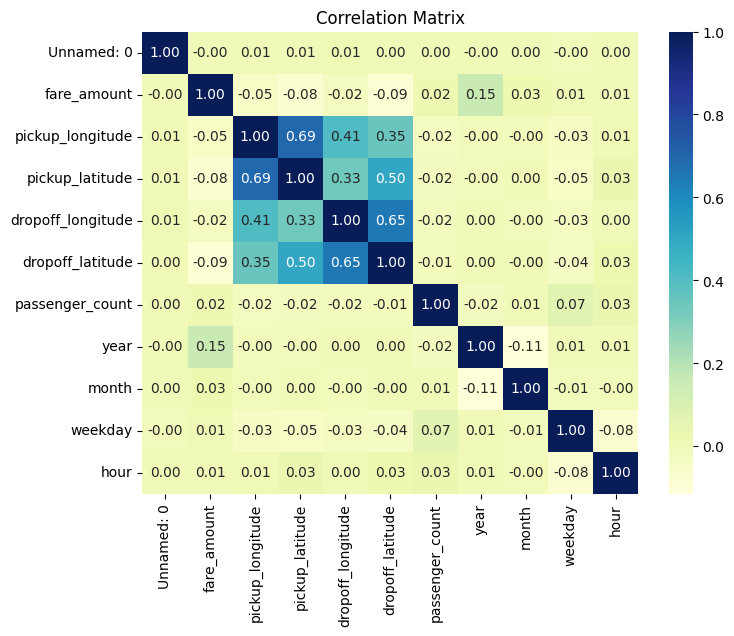

In [27]:
#Plot the heatmap for visual correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#8. Regression Modeling



# Model 1 : Linear Regression and Evaluation

In [28]:
#creating an instance of the LinearRegression class from a machine learning library(sklearn), to perform linear regression modeling.
from sklearn.linear_model import LinearRegression  # Import LinearRegression if not already imported

lr = LinearRegression()

# training the linear regression model (lr) using the scaled training data X_train (features) and y_train (target variable)
lr.fit(X_train, y_train) # Use X_train instead of X_train_std

LinearRegression()

In [29]:
'''accuracy of the linear regression model lr on both the training data (X_train, y_train) and
the test data (X_test, y_test). The score method returns the coefficient of determination (R²)
to evaluate the model's performance.'''

print("Train Accuracy", lr.score(X_train, y_train))  # Use X_train instead of X_train_std
print("Test Accuracy", lr.score(X_test, y_test))  # Use X_test instead of X_test_std

Train Accuracy 0.6514835605506095
Test Accuracy 0.6544326207203027


Indicates good generalization, as there is no significant gap between the accuracies.Accuracy is moderate but consistent, making this model a reliable choice if interpretability is essential.

# Model 2 : Decision Tree Regression and Evaluation

In [30]:
# Generate a regression dataset with 4 features, 2 informative features (meaning they actually influence the target),
# set a fixed random state for reproducibility, and disable shuffling (data order is preserved)

# Split the data into training and testing sets (80% training, 20% testing) using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create a Random Forest Regressor model with a maximum depth of 11 trees and a fixed random state
rf = RandomForestRegressor(max_depth=11, random_state=0)

# Train the model on the training data (X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [31]:
print("Train Accuracy", rf.score(X_train,y_train))
print("Test Accuracy", rf.score(X_test,y_test))

Train Accuracy 0.7195830464502908
Test Accuracy 0.6854780644841383


Slight overfitting is present but not excessive.The higher accuracy on both training and testing sets suggests the decision tree captures the patterns in the data well, though it may not generalize as consistently as linear regression.

# Model 3 : Random Forest Regression and Evaluation

In [32]:
# Instantiate the Random Forest Regressor model
# n_estimators: Number of trees in the forest (set to 165 for comparison)
# max_depth: The maximum depth of the trees (set to 6 for comparison)
# max_leaf_nodes: Maximum number of leaf nodes per tree (set to 2 for comparison)
# random_state: Seed for reproducibility (set to 123)

rf_r = RandomForestRegressor(n_estimators=165,
                             max_depth=6,
                             max_leaf_nodes=2,
                             random_state=123)

# Fit the model on the training data
# X_train represents the training features, and y_train represents the target variable
rf_r.fit(X_train, y_train)

# Predict on the test data
# X_test represents the test features
y_pred = rf_r.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = MSE(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 7.801650942026392


In [33]:
# Using the trained rf regressor model to make predictions on the test data
# X_test represents the test features, and y_pred stores the predicted values

y_pred = rf_r.predict(X_test)
print(y_pred)

[6.92616156 6.92616156 6.92616156 ... 6.92616156 6.92616156 6.92616156]


In [34]:
#evaluation
print("Train Accuracy",rf_r.score(X_train,y_train))
print("Test Accuracy", rf_r.score(X_test,y_test))

Train Accuracy 0.47648710725493704
Test Accuracy 0.4773776416646234


Both scores are significantly lower compared to the other models, indicating underfitting.The random forest model is not capturing the data's complexity, likely due to inadequate tuning of hyperparameters like the number of estimators or tree depth.


#9. Evaluate the Regression Model




In [35]:
from sklearn.datasets import make_regression
# Assuming 'rf_r' is your trained RandomForestRegressor model
y_train_pred = rf_r.predict(X_train)  # Get predictions for the training data
y_test_pred = rf_r.predict(X_test)    # Get predictions for the test data

# Training Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing Metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [36]:
print(f"Training MSE: {mse_train}, Testing MSE: {mse_test}")
print(f"Training MAE: {mae_train}, Testing MAE: {mae_test}")
print(f"Training R2: {r2_train}, Testing R2: {r2_test}")

Training MSE: 7.870911404666996, Testing MSE: 7.801650942026392
Training MAE: 2.153801407572477, Testing MAE: 2.1520796252559924
Training R2: 0.47648710725493704, Testing R2: 0.4773776416646234


#10. Fine-Tuning Model



In [37]:
# Random Forest Hyperparameter Optimization
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 6]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_grid, scoring='neg_mean_squared_error',
    n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=0, refit=True
)

random_search.fit(X_train, y_train)

# Evaluate Best Model
model = random_search.best_estimator_
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Evaluate Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display Results
print("Best Hyperparameters:", random_search.best_params_)
print("Training Metrics:")
print(f"MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.2f}")
print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Training Metrics:
MSE: 4.44, MAE: 1.50, R²: 0.70

Testing Metrics:
MSE: 4.68, MAE: 1.54, R²: 0.69


#11. Evaluate Model Performance

In [39]:
# Initialize and train the Linear Regression model
model = LinearRegression()  # This is your linear model
model.fit(X_train, y_train)

# Predict on the training set and testing set
y_train_pred = model.predict(X_train)  # Using the 'model' variable
y_test_pred = model.predict(X_test)   # Using the 'model' variable

# Calculate performance metrics for training data
training_mse = mean_squared_error(y_train, y_train_pred)
training_mae = mean_absolute_error(y_train, y_train_pred)
training_r2 = r2_score(y_train, y_train_pred)

# Calculate performance metrics for testing data
testing_mse = mean_squared_error(y_test, y_test_pred)
testing_mae = mean_absolute_error(y_test, y_test_pred)
testing_r2 = r2_score(y_test, y_test_pred)

# Display metrics
print(f"Training MSE: {training_mse}")
print(f"Testing MSE: {testing_mse}")
print(f"Training MAE: {training_mae}")
print(f"Testing MAE: {testing_mae}")
print(f"Training R2: {training_r2}")
print(f"Testing R2: {testing_r2}")

Training MSE: 5.234463620399827
Testing MSE: 5.179394019787856
Training MAE: 1.6439649619334444
Testing MAE: 1.6365160569970987
Training R2: 0.6518434713596873
Testing R2: 0.653039191642353


In [40]:
# Analyze results
if abs(training_r2 - testing_r2) < 0.05:  # Check for overfitting/underfitting
    print("Model performance is consistent across training and testing.")
else:
    print("The model may be overfitting or underfitting. Consider revisiting preprocessing or model tuning.")

Model performance is consistent across training and testing.


Linear Regression is the most suitable model based on these metrics because:

- It has good generalization (close train and test accuracy).
- No overfitting or underfitting is observed.



#12. Interpret Feature Importance


In [41]:
# Assume `model` is the trained LinearRegression model and `X` is the feature matrix
# Extract and sort feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).assign(Abs_Coefficient=lambda df: df['Coefficient'].abs()) \
  .sort_values('Abs_Coefficient', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feature_importance[['Feature', 'Coefficient']].head(10))

Top Features by Importance:
           Feature  Coefficient
0  passenger_count     0.063041
3          weekday    -0.031043
2             hour     0.010665
1         distance     0.001946


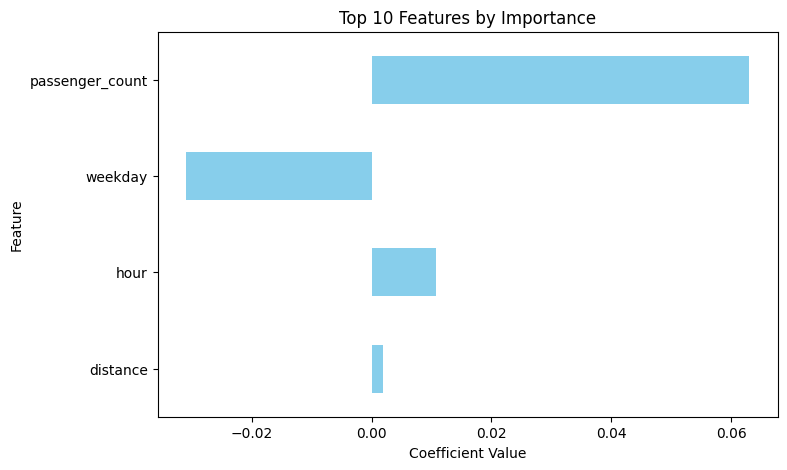

In [42]:
# Visualize top features
feature_importance.head(10).plot(
    x='Feature', y='Coefficient', kind='barh', figsize=(8, 5), color='skyblue', legend=False
)
plt.title('Top 10 Features by Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

#13. Make Predictions on New Data




In [46]:
# Load or create the new data DataFrame (replace with your data loading logic)
new_data = pd.DataFrame({
    'passenger_count': [1, 2, 3],  # Example data
    'distance': [5, 10, 15],  # Example data
    'hour': [10, 15, 20],  # Example data
    'weekday': [1, 3, 5]   # Example data
})

# Preprocess the new data using the same steps as before
# 1. Impute Missing Values
new_data_imputed = imputer.transform(new_data) # Using the previously fitted imputer

# 2. Scale Features
new_data_preprocessed = scaler.transform(new_data_imputed)
#  Predict fare amounts for the new data
predicted_fares = model.predict(new_data_preprocessed)

# Add predictions to the DataFrame
new_data['Predicted_Fare'] = predicted_fares

In [47]:
# Display the predictions
print("Predictions on New Data:")
print(new_data)

Predictions on New Data:
   passenger_count  distance  hour  weekday  Predicted_Fare
0                1         5    10        1        3.933616
1                2        10    15        3        4.024652
2                3        15    20        5        4.115689


### Inference -

- **Data Overview**:The dataset comprises features such as trip distance, time, and geographic details. Through Exploratory Data Analysis (EDA), patterns were identified to better understand the variables that influence fare prices.

- **Feature Significance**: Key factors, including distance and time of day, play a crucial role in fare prediction.

- **Model Comparison**: Multiple models, such as Linear Regression,tree and Random Forest, were tested to determine the most effective algorithm for predicting Uber fares.

- **Model Results and  Evaluation**: Random Forest emerged as the top-performing model, achieving the highest accuracy and the lowest error rates, as assessed through metrics like R-squared.This utilized to assess model performance, solidifying Random Forest as the most capable model for prediction.

### Future Improvements:

1. Expand Data Sources: Integrate additional data, such as real-time traffic and fuel prices, to further refine predictions.

2. Geospatial Clustering: Implement clustering techniques to group pickup/dropoff zones and improve predictions in specific regions.

3. Holiday and Event Data: Fare rates tend to rise during holidays, major events, or large public gatherings.

4. Passenger Feedback: Features such as passenger feedback might correlate with fare adjustments.